In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data.dataloader import DataLoader, Dataset
import torch
import torch.nn.functional as F
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn

In [2]:
df = pd.read_csv('./data (1).csv')

In [3]:
df

,index,Timestamp,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,ans
0,1998-02-15,00:00:00,0,8.77,5.69,20.84,-4.83,-10.06,6.68,2.10,...,4.52,0.29,16.60,400.10,318.41,467.43,54548.0,13443.0,215499.0,81.0
1,1998-02-20,00:00:00,0,5.18,3.13,23.99,0.38,-5.76,5.24,0.16,...,2.53,0.75,6.35,392.02,326.39,474.51,71561.0,15786.0,185234.0,35.0
2,1998-02-25,00:00:00,0,4.87,2.37,12.49,1.16,-6.73,4.48,0.56,...,2.71,0.48,20.51,359.05,304.87,439.40,57475.0,11069.0,148318.0,72.0
3,1998-03-02,00:00:00,0,7.37,2.57,20.03,0.43,-7.09,6.45,0.08,...,2.62,0.50,14.84,372.75,303.04,495.89,32613.0,10464.0,175143.0,100.0
4,1998-03-07,00:00:00,0,5.83,1.77,22.52,-0.77,-10.94,9.64,-0.53,...,2.74,0.60,12.23,303.19,274.03,551.26,20516.0,10435.0,406549.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,2022-05-25,00:00:00,2,6.03,2.11,14.39,2.31,-4.52,6.87,-0.27,...,8.66,1.66,40.26,401.20,296.80,555.70,132069.0,20116.0,615821.0,106.0
1774,2022-05-30,00:00:00,-1,6.03,2.11,14.39,2.31,-4.52,6.87,-0.27,...,8.66,1.66,40.26,401.20,296.80,555.70,132069.0,20116.0,615821.0,58.0
1775,2022-06-04,00:00:00,2,5.42,2.78,11.67,0.21,-6.06,7.02,-2.82,...,9.17,2.31,43.65,303.20,264.30,333.42,25958.0,10312.0,63745.0,66.0
1776,2022-06-09,00:00:00,1,6.96,2.60,14.81,-2.11,-9.46,5.88,1.58,...,10.60,4.50,24.27,348.30,287.90,538.30,50936.0,18966.0,1304596.0,21.0


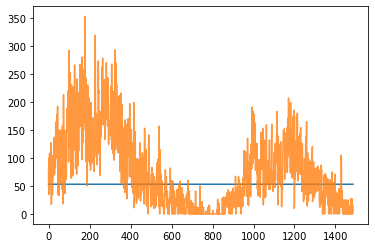

In [6]:
plt.plot(np.ones(len(df)-4*73)*53)
plt.plot(df['ans'][:-4*73].values, alpha=0.8)
     

In [7]:
df.shape

(1778, 31)

In [3]:
# train, test = train_test_split(df, test_size = 0.25, random_state=42)

train = df.iloc[:-4*73]
test = df.iloc[-4*73:]

In [7]:
train.shape, test.shape

((1486, 31), (292, 31))

In [20]:
df.drop('ans', 1)

C:\Users\rus75\AppData\Local\Temp/ipykernel_19196/2586128945.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('ans', 1)


,index,Timestamp,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
0,1998-02-15,00:00:00,0,8.77,5.69,20.84,-4.83,-10.06,6.68,2.10,...,74.59,4.52,0.29,16.60,400.10,318.41,467.43,54548.0,13443.0,215499.0
1,1998-02-20,00:00:00,0,5.18,3.13,23.99,0.38,-5.76,5.24,0.16,...,54.54,2.53,0.75,6.35,392.02,326.39,474.51,71561.0,15786.0,185234.0
2,1998-02-25,00:00:00,0,4.87,2.37,12.49,1.16,-6.73,4.48,0.56,...,76.91,2.71,0.48,20.51,359.05,304.87,439.40,57475.0,11069.0,148318.0
3,1998-03-02,00:00:00,0,7.37,2.57,20.03,0.43,-7.09,6.45,0.08,...,76.81,2.62,0.50,14.84,372.75,303.04,495.89,32613.0,10464.0,175143.0
4,1998-03-07,00:00:00,0,5.83,1.77,22.52,-0.77,-10.94,9.64,-0.53,...,55.39,2.74,0.60,12.23,303.19,274.03,551.26,20516.0,10435.0,406549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,2022-05-25,00:00:00,2,6.03,2.11,14.39,2.31,-4.52,6.87,-0.27,...,69.38,8.66,1.66,40.26,401.20,296.80,555.70,132069.0,20116.0,615821.0
1774,2022-05-30,00:00:00,-1,6.03,2.11,14.39,2.31,-4.52,6.87,-0.27,...,69.38,8.66,1.66,40.26,401.20,296.80,555.70,132069.0,20116.0,615821.0
1775,2022-06-04,00:00:00,2,5.42,2.78,11.67,0.21,-6.06,7.02,-2.82,...,81.61,9.17,2.31,43.65,303.20,264.30,333.42,25958.0,10312.0,63745.0
1776,2022-06-09,00:00:00,1,6.96,2.60,14.81,-2.11,-9.46,5.88,1.58,...,61.60,10.60,4.50,24.27,348.30,287.90,538.30,50936.0,18966.0,1304596.0


In [22]:
pd.set_option('Display.max_columns', None)

In [23]:
df.head(2)

,index,Timestamp,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,By-max,Bz-med,Bz-min,Bz-max,Phi-mean,Phi-min,Phi-max,Theta-med,Theta-min,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,ans
0,1998-02-15,00:00:00,0,8.77,5.69,20.84,-4.83,-10.06,6.68,2.10,-9.15,17.48,1.88,-12.98,14.09,160.87,41.79,290.00,14.01,-76.00,74.59,4.52,0.29,16.60,400.10,318.41,467.43,54548.0,13443.0,215499.0,81.0
1,1998-02-20,00:00:00,0,5.18,3.13,23.99,0.38,-5.76,5.24,0.16,-4.79,6.23,-0.17,-5.05,4.49,179.36,47.00,327.08,-1.97,-64.89,54.54,2.53,0.75,6.35,392.02,326.39,474.51,71561.0,15786.0,185234.0,35.0


In [112]:
train

,index,Timestamp,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,By-max,Bz-med,Bz-min,Bz-max,Phi-mean,Phi-min,Phi-max,Theta-med,Theta-min,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,ans
192,2000-10-02,00:00:00,0,9.29,2.94,26.74,-3.13,-13.39,9.65,0.02,-21.37,16.38,-4.03,-19.42,17.80,182.85,24.25,319.31,-24.10,-83.82,80.48,5.61,1.35,27.50,420.92,358.80,537.82,35761.0,10465.0,281430.0,218.0
1285,2015-09-19,00:00:00,0,7.12,2.19,16.09,-0.85,-10.48,7.84,-0.19,-7.83,11.60,1.56,-8.40,7.51,202.90,3.44,356.36,16.15,-68.24,77.89,3.37,1.05,12.38,510.88,387.77,638.31,132551.0,33727.0,582641.0,64.0
309,2002-05-10,00:00:00,0,6.15,2.68,19.75,2.38,-8.21,6.92,-2.22,-17.14,9.84,-0.50,-15.62,8.37,323.09,3.34,357.15,-4.51,-80.74,81.31,4.32,1.66,42.50,440.12,344.29,533.02,118210.0,21461.0,372300.0,207.0
674,2007-05-09,00:00:00,0,2.80,0.97,4.65,-1.77,-4.30,2.32,0.92,-2.30,3.29,0.53,-2.11,3.12,142.76,13.77,348.70,12.63,-41.65,71.85,1.67,0.49,3.35,418.61,299.06,616.93,53210.0,10753.0,162282.0,18.0
63,1998-12-27,00:00:00,0,7.36,4.48,16.20,-4.25,-12.50,4.27,-0.28,-9.83,10.17,1.66,-8.44,6.27,190.87,63.50,325.52,12.74,-75.56,77.20,6.16,3.55,15.24,396.13,344.61,438.89,65712.0,21669.0,191479.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2013-08-05,00:00:00,0,4.79,1.07,10.04,-3.12,-7.19,3.94,1.31,-6.47,4.39,-0.52,-5.46,8.94,167.09,79.69,321.73,-7.13,-62.47,77.35,0.50,0.10,4.57,440.22,344.70,562.88,95045.0,18070.0,560800.0,82.0
1294,2015-11-03,00:00:00,0,7.59,4.56,25.12,-3.86,-13.75,8.65,-1.66,-15.54,16.49,-1.09,-13.75,18.12,208.20,16.78,345.37,-8.09,-75.88,69.31,2.34,0.60,86.42,555.29,330.38,738.15,132404.0,18557.0,741038.0,82.0
860,2009-11-24,00:00:00,0,3.08,0.91,7.84,-0.30,-6.66,4.55,1.11,-4.25,5.05,-0.36,-5.29,4.53,110.22,6.63,354.16,-8.11,-65.62,78.07,0.93,0.17,10.10,359.34,326.51,446.67,51411.0,21832.0,120290.0,0.0
1459,2018-02-05,00:00:00,2,4.81,1.71,6.71,-2.55,-5.94,4.94,1.73,-4.60,5.28,0.47,-4.14,4.14,139.15,9.57,351.65,6.31,-68.74,58.49,6.39,0.80,15.20,404.76,322.90,450.10,150434.0,16167.0,227126.0,13.0


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
for col in train.drop(['ans', 'index', 'Timestamp'], axis=1):
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.fit_transform(test[col].values.reshape(-1, 1))

In [6]:
class SequenceDataset(Dataset):
    def __init__(self, df, sequence_length=5):
        self.sequence_length = sequence_length
        self.df = df
        self.y = torch.tensor(np.log1p(df['ans'].values)).float()
        self.X = torch.tensor(self.df.drop(['ans', 'index', 'Timestamp'], axis=1).values).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)

        return x, self.y[i]

In [7]:
trainDS = SequenceDataset(train)#, mode = 'train', scaler=scaler)
testDS = SequenceDataset(test)#, mode = 'val', scaler = scaler)

In [8]:
for col in df.drop(['ans', 'index', 'Timestamp'], axis=1):
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [9]:
all_ds = SequenceDataset(df)
all_dl = DataLoader(all_ds, batch_size=16, shuffle=False)

In [10]:
train_loader = DataLoader(trainDS, batch_size=512, shuffle=True)
test_loader = DataLoader(testDS, batch_size=512, shuffle=False)

In [11]:
class ShallowRegressionLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units):
        super().__init__()
        self.num_sensors = num_sensors
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = nn.LSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        
        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn[0]).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out

In [12]:
num_hidden_units = 16
model = ShallowRegressionLSTM(num_sensors=len(df.drop(['ans', 'index', 'Timestamp'], axis=1).columns), hidden_units=num_hidden_units)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

In [13]:
def train_model(data_loader, model, loss_function, optimizer):
    num_batches = len(data_loader)
    total_loss = 0
    model.train()
    
    for X, y in data_loader:
        output = model(X)
        loss = loss_function(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / num_batches
    # print(f"Train loss: {avg_loss}")

def test_model(data_loader, model, loss_function):
    
    num_batches = len(data_loader)
    total_loss = 0

    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            output = model(X)
            total_loss += loss_function(output, y).item()

    avg_loss = total_loss / num_batches
    # print(f"Test loss: {avg_loss}")

In [14]:
from IPython.display import clear_output
from tqdm.notebook import tqdm

In [ ]:
for ix_epoch in tqdm(range(1000)):
    # print(f"Epoch {ix_epoch}\n---------")
    train_model(train_loader, model, loss_function, optimizer=optimizer)
    test_model(test_loader, model, loss_function)
    # print()

  0%|          | 0/1000 [00:00<?, ?it/s]

In [107]:
# out = []
# y_ = []
# for X, y in test_loader:
#     y_.extend(list(y.detach().numpy()))
#     output = model(X)
#     out.extend(list(output.detach().numpy()))

In [50]:
output.detach().numpy()

array([11.092953, 11.607077, 13.402645, 13.413502, 11.698206, 11.698206,
       11.698206, 11.698206, 13.414974, 13.414974, 11.698206, 11.698206,
       11.698206, 11.698206, 11.698206, 11.092953], dtype=float32)

In [58]:
list(y_[0])

[174.0,
 61.0,
 12.0,
 0.0,
 26.0,
 56.0,
 87.0,
 0.0,
 24.0,
 66.0,
 33.0,
 33.0,
 79.0,
 13.0,
 123.0,
 15.0]

In [145]:
out = []
y_ = []
for X, y in all_dl:
    y_.extend(list(y.detach().numpy()))
    output = model(X)
    out.extend(list(output.detach().numpy()))

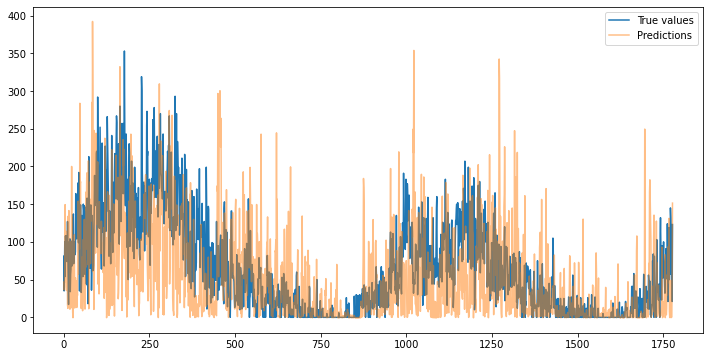

In [148]:
plt.figure(figsize=(12, 6))
plt.plot(np.expm1(y_), label = 'True values')
plt.plot(np.expm1(out), label = 'Predictions', alpha = .5)
plt.legend()

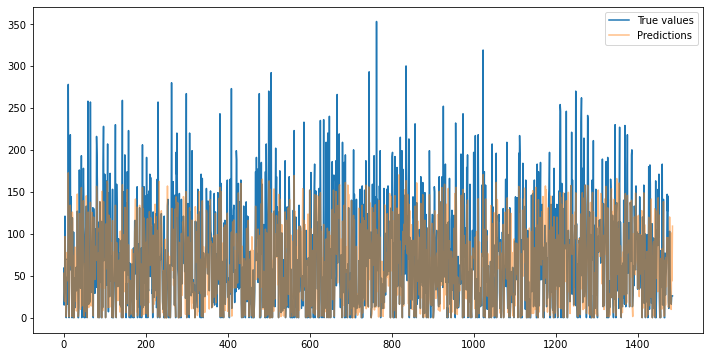

In [23]:
out = []
y_ = []
for X, y in train_loader:
    y_.extend(list(y.detach().numpy()))
    output = model(X)
    out.extend(list(output.detach().numpy()))
    
plt.figure(figsize=(12, 6))
plt.plot(np.expm1(y_), label = 'True values')
plt.plot(np.expm1(out), label = 'Predictions', alpha = .5)
plt.legend()

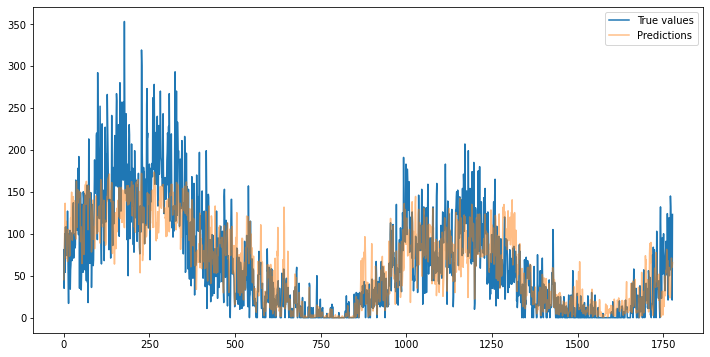

In [24]:
out = []
y_ = []
for X, y in all_dl:
    y_.extend(list(y.detach().numpy()))
    output = model(X)
    out.extend(list(output.detach().numpy()))
    
plt.figure(figsize=(12, 6))
plt.plot(np.expm1(y_), label = 'True values')
plt.plot(np.expm1(out), label = 'Predictions', alpha = .5)
plt.legend()

In [26]:
t_ = SequenceDataset(train)#, mode = 'train', scaler=scaler)
tl = DataLoader(t_, batch_size=512, shuffle=False)

In [29]:
t_ = SequenceDataset(test)#, mode = 'train', scaler=scaler)
tl = DataLoader(t_, batch_size=512, shuffle=False)

Metric: 40.861637115478516


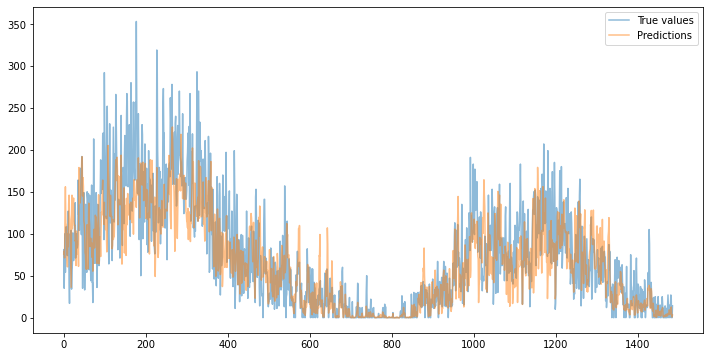

In [61]:
t_ = SequenceDataset(train)#, mode = 'train', scaler=scaler)
tl = DataLoader(t_, batch_size=512, shuffle=False)
out = []
y_ = []
for X, y in tl:
    y_.extend(list(y.detach().numpy()))
    output = model(X)
    out.extend(list(output.detach().numpy()))
    
plt.figure(figsize=(12, 6))
plt.plot(np.expm1(y_), label = 'True values',alpha = .5)
plt.plot(np.expm1(out), label = 'Predictions', alpha = .5)
plt.legend()

print(f'Metric: {np.sqrt(np.mean((np.expm1(y_) - np.expm1(out))**2))}')

Metric: 51.63111114501953


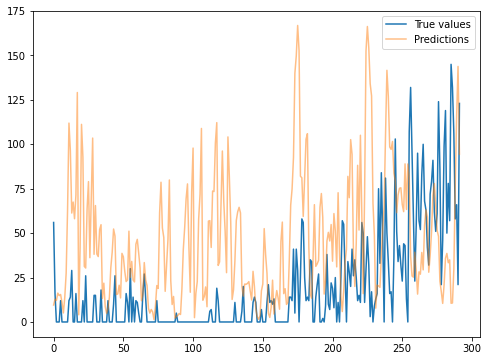

In [63]:
t_ = SequenceDataset(test)#, mode = 'train', scaler=scaler)
tl = DataLoader(t_, batch_size=512, shuffle=False)
out = []
y_ = []
for X, y in tl:
    y_.extend(list(y.detach().numpy()))
    output = model(X)
    out.extend(list(output.detach().numpy()))
    
plt.figure(figsize=(8, 6))
plt.plot(np.expm1(y_), label = 'True values')
plt.plot(np.expm1(out), label = 'Predictions', alpha = .5)
plt.legend()

print(f'Metric: {np.sqrt(np.mean((np.expm1(y_) - np.expm1(out))**2))}')

In [34]:
np.sqrt(np.mean((np.expm1(y_) - np.expm1(out))**2))

52.396416

In [28]:
df.shape

(1778, 31)

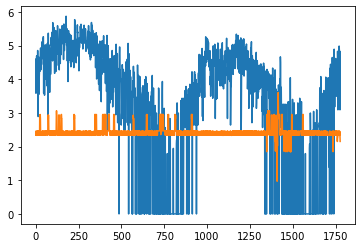

In [110]:
plt.plot(y_)
plt.plot(out)

<AxesSubplot:>

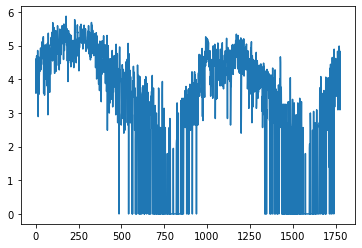

In [68]:
np.log1p(df['ans']).plot()

<AxesSubplot:>

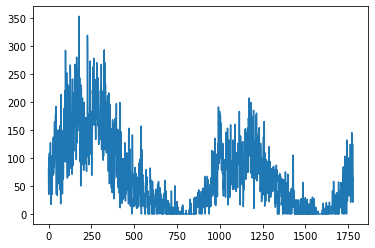

In [69]:
df['ans'].plot()